In [1]:
# import libraries
from PIL import Image
from pytwmap import *

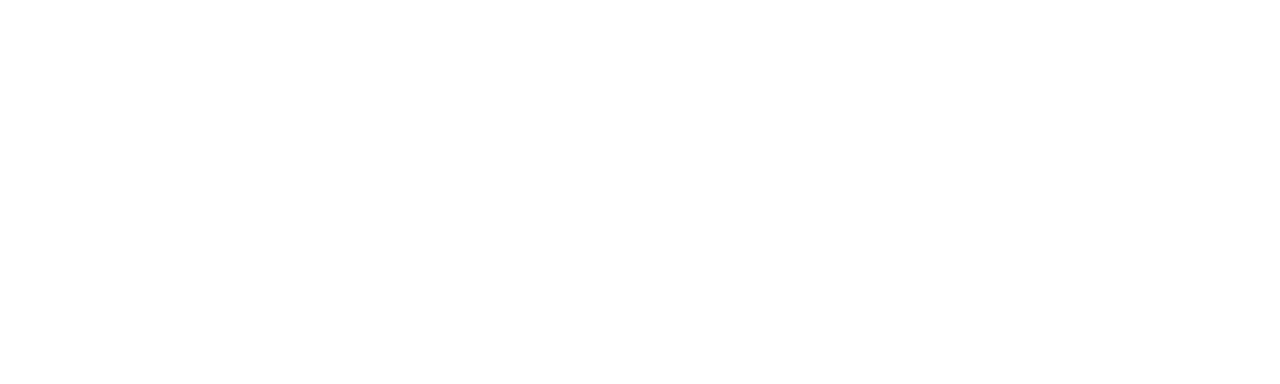

In [2]:
# load the image and convert it to rgba
img = Image.open('data/poker_suits_to_map_1280.png')
img = img.convert('RGBA')
img

In [3]:
# create a new map
m = TWMap()

# resize the gamelayer (currently discards all data even when upscaling)
m.game_layer.tiles.resize(img.width, img.height)

# iterate through each pixel
for x in range(img.width):
    for y in range(img.height):
        # extract alpha value
        _, _, _, alpha = img.getpixel((x, y))  # type: ignore

        # set hookables if alpha is greater than a threshold
        if alpha >= 130:
            m.game_layer.tiles.set_id(x, y, GameTileType.SOLID)

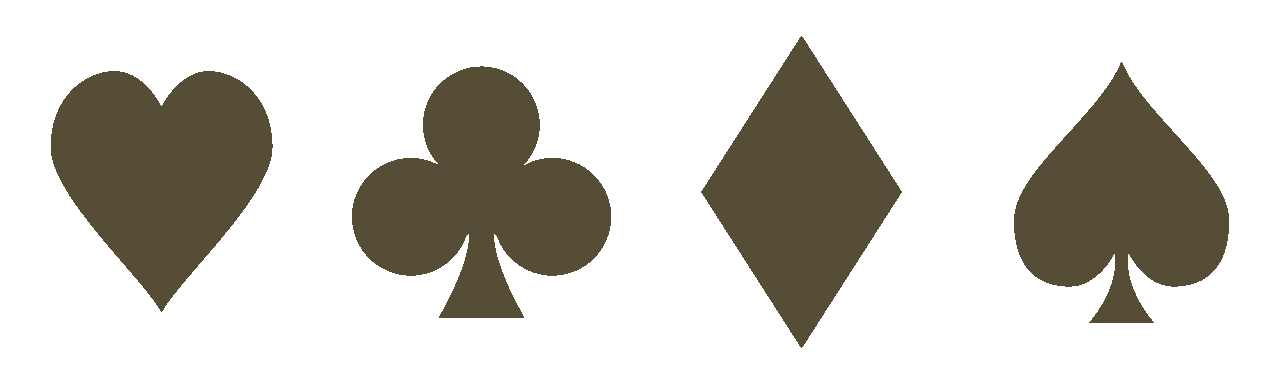

In [4]:
# validate output (right now this is a little slow)
r = MapRenderer(m, (img.width, img.height), tile_scale=1)
r.generate_tilesets()
r.render_map_gameplay()
r.get_image()

In [5]:
# save output
m.save('data/poker_suits.map')